# Benchmark Pillow vs OpenCV

HW: 2.6 GHz Intel Core i7 | 16 GB 1600 MHz DDR3 | SSD | MacOSX 

In [110]:
import PIL
import cv2

In [111]:
PIL.__version__, cv2.__version__

('4.1.0', '3.2.0')

In [112]:
cv2.__spec__

ModuleSpec(name='cv2.cv2', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x1025f1358>, origin='/usr/local/lib/python3.5/site-packages/cv2/cv2.cpython-35m-darwin.so')

In [113]:
PIL.__spec__

ModuleSpec(name='PIL', loader=<_frozen_importlib_external.SourceFileLoader object at 0x1025bcc18>, origin='/usr/local/lib/python3.5/site-packages/PIL/__init__.py', submodule_search_locations=['/usr/local/lib/python3.5/site-packages/PIL'])

In [114]:
import os
this_path = os.path.dirname('.')

if 'INPUT_PATH' in os.environ:
    INPUT_PATH = os.environ['INPUT_PATH']
else:
    INPUT_PATH = os.path.abspath(os.path.join(this_path, '..', 'input'))

TRAIN_DATA = os.path.join(INPUT_PATH, "train")

from glob import glob
filenames = glob(os.path.join(TRAIN_DATA, "*.jpg"))

In [16]:
len(filenames)

5088

## 1 stage: 100 images, load image + blur + flip

In [94]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pylab as plt
%matplotlib inline


def stage_1_PIL(filename):
    img_pil = Image.open(filename)
    img_pil = ImageOps.box_blur(img_pil, radius=3)
    img_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
    return np.asarray(img_pil)

def stage_1_cv2(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.blur(img, ksize=(3, 3))
    img = cv2.flip(img, flipCode=1)
    return img

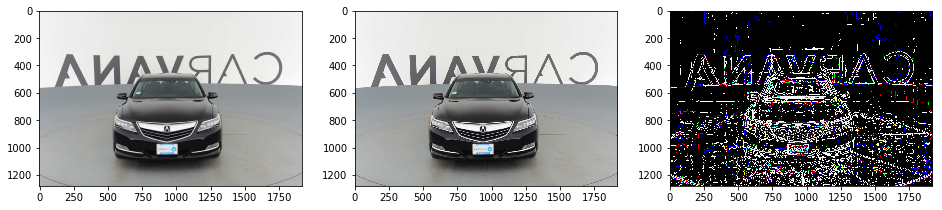

In [96]:
f = filenames[0]
r1 = stage_1_PIL(f) 
r2 = stage_1_cv2(f)

plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(r1)
plt.subplot(132)
plt.imshow(r2)
plt.subplot(133)
plt.imshow(np.abs(r1 - r2))

In [97]:
%timeit -n5 -r2 [stage_1_PIL(f) for f in filenames[:100]]

5 loops, best of 2: 11.6 s per loop


In [98]:
%timeit -n5 -r2 [stage_1_cv2(f) for f in filenames[:100]]

5 loops, best of 2: 9.93 s per loop


## 2 stage: 500 images, load image + resize + 2 flips

In [106]:
import numpy as np
from PIL import Image, ImageOps


def stage_2_PIL(filename):
    img_pil = Image.open(filename)
    img_pil = img_pil.resize((512, 512), Image.CUBIC)
    img_pil = img_pil.transpose(Image.FLIP_LEFT_RIGHT)
    img_pil = img_pil.transpose(Image.FLIP_TOP_BOTTOM)
    return np.asarray(img_pil)

def stage_2_cv2(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    img = cv2.resize(img, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
    img = cv2.flip(img, flipCode=1)
    img = cv2.flip(img, flipCode=0)
    return img

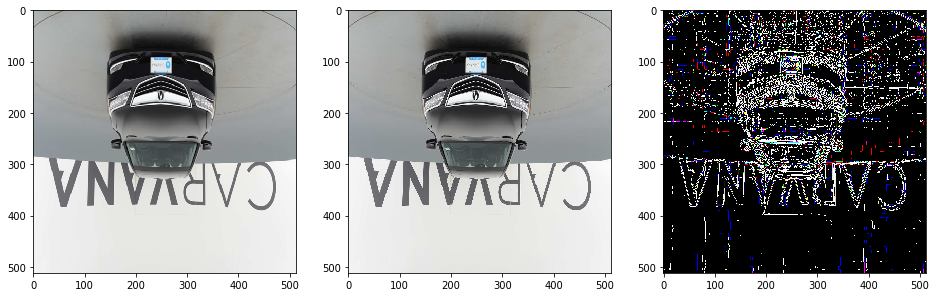

In [107]:
f = filenames[0]
r1 = stage_2_PIL(f) 
r2 = stage_2_cv2(f)

plt.figure(figsize=(16, 16))
plt.subplot(131)
plt.imshow(r1)
plt.subplot(132)
plt.imshow(r2)
plt.subplot(133)
plt.imshow(np.abs(r1 - r2))

In [108]:
%timeit -n5 -r2 [stage_2_PIL(f) for f in filenames[:200]]

5 loops, best of 2: 17.1 s per loop


In [109]:
%timeit -n5 -r2 [stage_2_cv2(f) for f in filenames[:200]]

5 loops, best of 2: 13.4 s per loop
